In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar7/homework/TCGA-COAD_cancer_normal.tsv", sep="\t", index_col = 0)
gl = pd.read_csv("https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar7/homework/gene_lengths.tsv", sep="\t", index_col=0).sort_index()

In [3]:
RPM = df.div(df.sum(axis=0) / 10**6, axis=1)
RPKM = RPM.div(gl["Length"] / 10**3, axis=0)

In [4]:
size_factors = [0.35219656, 0.39439086, 0.73057344, 1.66138079, 1.60002838, 1.48313616, 1.28046971, 0.92434274, 1.59306799, 1.34997698]
RPKM_norm = RPKM.div(size_factors, axis=1)

In [5]:
def absLFC(x):
    df = np.log2(x + 1)
    df = df.loc[df.max(axis=1) > 0]
    df["median"] = df.median(axis=1)
    df = df.sort_values("median", ascending=False)
    df = df.iloc[:len(df)//2]
    df["LFC"] = df.iloc[:, 0:5].mean(axis=1) - df.iloc[:, 5:10].mean(axis=1)
    df["absLFC"] = np.abs(df["LFC"])
    df = df.sort_values("absLFC", ascending=False)
    return(df)

In [6]:
df = absLFC(RPKM)
df_norm = absLFC(RPKM_norm)

top-100:

In [7]:
df = df.iloc[0:100]
df_norm = df_norm.iloc[0:100]

In [8]:
common = df.join(df_norm, how = 'inner', rsuffix = '_norm')

In [9]:
common

,TCGA-A6-2682-01A,TCGA-A6-2683-01A,TCGA-A6-2685-01A,TCGA-A6-2686-01A,TCGA-A6-5662-01A,TCGA-A6-5667-11A,TCGA-AA-3489-11A,TCGA-AA-3496-11A,TCGA-AA-3511-11A,TCGA-AA-3514-11A,...,TCGA-A6-2686-01A_norm,TCGA-A6-5662-01A_norm,TCGA-A6-5667-11A_norm,TCGA-AA-3489-11A_norm,TCGA-AA-3496-11A_norm,TCGA-AA-3511-11A_norm,TCGA-AA-3514-11A_norm,median_norm,LFC_norm,absLFC_norm
Gene,,,,,,,,,,,,,,,,,,,,,
CLCA4,1.849900,0.277997,2.329522,0.033156,0.221514,7.342999,7.714905,8.414783,7.000265,8.600960,...,0.020048,0.142375,6.778634,7.360156,8.527963,6.335125,8.169325,4.702391,-6.122870,6.122870
CA1,0.474558,0.100342,3.401280,0.167512,0.131487,8.832305,6.415694,6.230726,8.827633,6.339451,...,0.103138,0.083571,8.265182,6.063753,6.342772,8.157707,5.912738,4.864825,-5.884420,5.884420
AQP8,1.691560,1.442719,4.589127,0.276770,0.080671,8.986651,5.297092,8.540759,9.133960,8.393652,...,0.172860,0.050945,8.419374,4.950674,8.653966,8.463674,7.962218,4.988230,-5.580947,5.580947
CD177,1.246497,0.108497,3.342146,0.132413,0.113286,8.296212,6.237087,5.931638,8.335501,8.294636,...,0.081147,0.071838,7.729776,5.885769,6.043349,7.666340,7.863309,4.820983,-5.745335,5.745335
GUCA2A,4.146313,1.486633,6.102523,1.064531,3.389446,9.733242,9.326233,9.699265,9.543756,9.927117,...,0.728554,2.791678,9.165410,8.970190,9.812634,8.873094,9.494700,7.711424,-5.634058,5.634058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPNE7,3.517836,6.654673,2.663494,3.675658,1.560978,0.157142,0.205404,0.263499,0.285269,0.144028,...,3.016076,1.149952,0.107808,0.162847,0.283078,0.185541,0.108048,0.716515,3.860015,3.860015
KLK10,2.917771,2.692140,7.166619,0.771588,4.893014,0.525168,0.109263,0.585531,0.177636,0.151515,...,0.511609,4.243761,0.374135,0.086028,0.624395,0.114033,0.113737,0.568002,3.849272,3.849272
RP11-329L6.2,5.175796,7.676632,4.028057,3.535255,1.260821,1.177403,0.878763,0.760267,1.012192,1.061516,...,2.882912,0.905109,0.888065,0.726892,0.807843,0.712265,0.852231,0.896587,3.985513,3.985513


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

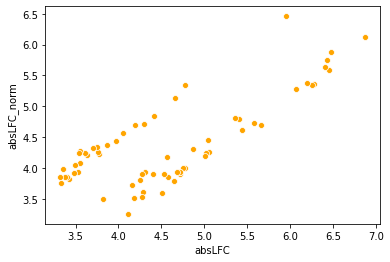

In [11]:
sns.scatterplot(data = common, x = 'absLFC', y = 'absLFC_norm', color = 'Orange')
plt.tight_layout